<div style="border:solid purple 2px; padding: 20px">
    
Айбек, привет! 👋
    
Меня зовут Рустам Муртазин, и я буду делать ревью проектной работы по статистическому анализу данных. Давай будем общаться на **«ты»**. Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на **«вы»**.

Цель моей работы — не указать на ошибки, а поделиться опытом, и постаратья сделать проект еще лучше, чтобы всех повалить своим решением 😁 Комментарии в работе позволят тебе расставить приоритеты.

Обрати внимание в первую очередь на те, что помечаны <span style="color:red">красным цветом</span>. После их доработки проект будет принят. <span style="color:green">Зеленым цветом</span> отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. <span style="color:orange">Оранжевым цветом</span> выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

Мне понравился твой проект, однако местами его нужно чуть доработать, я оставил комментарии тебе в помощь. После того, как ты все доработаешь, я смогу принять твой проект!) В конце есть чек-лист 😉

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

Спасибо за быструю и качественную доработку комментариев! Все моменты были исправлены, так что работу я принимаю. Надеюсь ты учтешь мои комментарии в последующих работах. Благодарю за старания и интерес и желаю успехов в дальнейших проектах 😊

</div>

In [1]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from functools import reduce
idx = pd.IndexSlice
from scipy import stats as st

<div class="alert alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

Это небольшая работа, но нам все равно важно стараться оформлять её максимально приближенно к реальным бизнес-задачам. Это означает как минимум постановку задачи, которую мы, как аналитики, перед сорбой ставим. И очень хорошо, если это будет твое видение и понимание вопроса, а не копия задания.  
    В реальной жизни коллеги может и простят, но точно не поймут, увидев исследование без осознанных установленных целей вначале.  
    Ну и также здорово бы сделать описание данных и хотя бы коротенький план. Так проект выглядит цельно, и его сполна смогут оценить не только ревьюеры и наставники, но и люди со стороны, в том числе, **потенциальные работодатели**.

<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

В данной работе необходимо определить перспективный тариф компании Мегалайн \
Мегалайн предлагает два тарифных плана: "Смарт" и "Ультра". Коммерческий отдел Мегалайна хочет понять, какой тариф приносит больше денег, чтобы скорретировать рекламный бюджет. Необходимо сделать анализ тарифов на небольшой выборке клиентов. У нас имеется данные 500 клиентов и информацией: кто они, откуда, каким тарифом пользуются и сколько звонков и сообщений отравили за 2018 год. Нужно проаналтзтовать поведение клиентов и сделать вывод - какой из тарифов лучше

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

Другое дело 👍

## Обработка данных

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

Ты уже наверное заметил, недавно добавили плагин `toc` для Jupyter, позволяющий сделать [автоматическое оглавление](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/toc2/README.html). Так вот, если тебе не нравится автоматическая нумерация с `toc`, то ее можно убрать. Для этого нужно сделать следующее:
    
- выведи оглавление, для этого нажми на значок списка (находится справа от `Validate`)
- слева выйдет само оглаление, нажми на шестиренку
- и убери галку с функции автоматической нумерации `Automatically number headings`

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

### Общая информация

#### Users

In [3]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
print('Общее кол-во:', users.shape[0])
print('Уникальные:', users['user_id'].count())
print('Дубликаты:', users.duplicated().sum())

Общее кол-во: 500
Уникальные: 500
Дубликаты: 0


Пользователи уникальные

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [7]:
users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Иваново             1
Нижневартовск       1
Химки               1
Подольск            1
Архангельск         1
Name: city, Length: 76, dtype: int64

Большинство пользователей из Москвы и Санкт-Петербурга

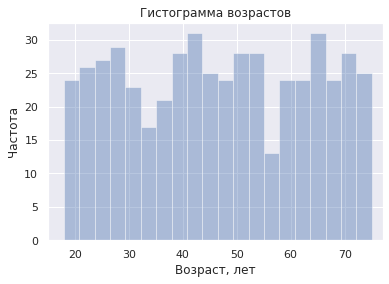

In [8]:
sns.distplot(users['age'], kde=False, bins=20)
plt.xlim(15, 77)
plt.title('Гистограмма возрастов')
plt.xlabel('Возраст, лет')
plt.ylabel('Частота')
plt.show()

Вывод: \
churn_date - есть пустые значения, но согласно описанию это нормально \
churn_date, reg_date - поменял формат на дату \
дубликатов по юзерам не имеется \

#### Calls

In [9]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [10]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month
calls['duration'] = calls['duration'].apply(np.ceil)
calls.loc[calls['duration'] == 0, 'duration'] = 1

<div class = "alert alert-success">
<h2> Комментарии ревьюера <a class="tocSkip"> </h2>

Молодец, что не забыл округлить данные. Кстати метод `np.ceil` можно применять без `apply`, вот так `np.ceil(calls['duration'])`

</div>

<div class = "alert alert-warning">
<h2> Комментарии ревьюера <a class="tocSkip"> </h2>

В реальном бизнесе, я думаю ты согласишься, что нужно задать вопрос разработчикам про данные с нулевой длительностью

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

Обычно в датафрейме содержатся данные нескольких лет - и тогда метод `month` может привести к ошибке: например, июнь 2019 и июнь 2020 могут стать одним месяцем. Чтобы этого избежать, можно использовать метод `astype('datetime64[M]')`. Он приводит дату к формату первое число - месяц - год

Вывод: \
Без пропусков, все нормально \
call_date - меняем на datetime \
Добавили новый столбец со значением месяца \
Округляем поле duration

#### Messages

In [12]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

Вывод: \
Данные полные, без пропусков \
messages_date - на datetime

#### Internet

In [15]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [16]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [17]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet.loc[internet['mb_used'] == 0, 'mb_used'] = 1

Вывод: \
Данные полные, без пропусков \
session_date - на datetime \
Округляем mb_used

#### Tariffs

In [18]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Вывод: \
Просто справочная таблица

## Предобработка данных 
Данные уже приведены к необходимым типам \
Необходимо найти и исправить ошибки \
Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [19]:
# Случайные 10 строк
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
260,1260,56,NaT,Москва,Афанасий,Горбунов,2018-07-16,smart
198,1198,26,NaT,Ярославль,Эдуард,Швецов,2018-08-15,smart
179,1179,43,NaT,Вологда,Дана,Астапенко,2018-04-19,smart
16,1016,58,NaT,Омск,Марица,Сазонова,2018-11-21,ultra
194,1194,70,NaT,Москва,Егор,Наумов,2018-12-03,smart
269,1269,31,NaT,Омск,Аким,Ахмадулин,2018-07-17,smart
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
290,1290,68,NaT,Нижний Новгород,Арсений,Безруков,2018-05-11,smart
129,1129,48,NaT,Курган,Анвар,Морозов,2018-12-17,smart
277,1277,30,NaT,Новосибирск,Валерия,Андреенко,2018-02-19,ultra


In [20]:
# Для подсчета при создании сводной таблицы сгенерируем уникальный код из имени и населенного пункта
users['unique_name'] = users['city'] + users['first_name'] + users['last_name']

# Сводная таблица по звонкам
calls_temp = calls.merge(users, on='user_id', how='inner')
calls_grouped = calls_temp.pivot_table(values=['unique_name', 'duration'], 
                       index=['user_id', 'month'], 
                       aggfunc={'unique_name': 'count', 'duration': 'sum'})
calls_grouped.columns = ['duration', 'calls']

# Сводная таблица по сообщениям
messages['month'] = messages['message_date'].dt.month
messages_temp = messages.merge(users, on='user_id', how='inner')
messages_grouped = messages_temp.pivot_table(values='unique_name', 
                       index=['user_id', 'month'], 
                       aggfunc={'unique_name': 'count'})
messages_grouped.columns = ['messages']

# Сводная таблица по интернет-трафику
internet['month'] = internet['session_date'].dt.month
internet_temp = internet.merge(users, on='user_id', how='inner')
internet_grouped = internet_temp.pivot_table(values='mb_used', 
                       index=['user_id', 'month'], 
                       aggfunc={'mb_used': 'sum'})
internet_grouped.columns = ['mb_used']

# Объединяем все три сводные таблицы в одну
dfs = [calls_grouped, messages_grouped, internet_grouped]
grouped_data = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), dfs)
grouped_data.head(10)

duration  calls  messages  mb_used
user_id month                                    
1000    5         164.0   22.0      22.0   2257.0
        6         187.0   43.0      60.0  23262.0
        7         346.0   47.0      75.0  14017.0
        8         418.0   52.0      81.0  14072.0
        9         478.0   58.0      57.0  14583.0
        10        363.0   57.0      73.0  14717.0
        11        344.0   43.0      58.0  14769.0
        12        341.0   46.0      70.0   9829.0
1001    11        444.0   59.0       NaN  18460.0
        12        430.0   63.0       NaN  14059.0

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

Молодец, что проводишь объединение задавая параметр `how='outer'`. Так мы не потеряем данные

In [21]:
# Пропущенные значения заменяем на нули
grouped_data.loc[grouped_data['duration'].isna(), 'duration'] = 0
grouped_data.loc[grouped_data['messages'].isna(), 'messages'] = 0
grouped_data.loc[grouped_data['mb_used'].isna(), 'mb_used'] = 0

# Добавим наименование используемого тарифа для каждого пользователя
for user in grouped_data.index:
    grouped_data.loc[user, 'tariff'] = users.loc[user[0]-1000, 'tariff']

In [22]:
# Пропущенные значения заменяем на нули
grouped_data.loc[grouped_data['duration'].isna(), 'duration'] = 0
grouped_data.loc[grouped_data['messages'].isna(), 'messages'] = 0
grouped_data.loc[grouped_data['mb_used'].isna(), 'mb_used'] = 0

# Добавим наименование используемого тарифа для каждого пользователя
for user in grouped_data.index:
    grouped_data.loc[user, 'tariff'] = users.loc[user[0]-1000, 'tariff']

# Функция подсчета выручки с каждого пользователя в месяц
def det_revenue(row):
    messages = row['messages']
    mb_used = row['mb_used']
    tariff = row['tariff']
    duration = row['duration']
    calls = row['calls']
    
    if tariff == 'smart':
        extra_duration = duration - tariffs.loc[0, 'minutes_included']
        extra_mb = mb_used - tariffs.loc[0, 'mb_per_month_included']
        extra_messages = messages - tariffs.loc[0, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (tariffs.loc[0, 'rub_per_message'] * extra_messages + 
                   (tariffs.loc[0, 'rub_per_gb'] / 1024) * extra_mb + 
                   tariffs.loc[0, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[0, 'rub_monthly_fee']
                  ) 
    else:
        extra_duration = duration - tariffs.loc[1, 'minutes_included']
        extra_mb = mb_used - tariffs.loc[1, 'mb_per_month_included']
        extra_messages = messages - tariffs.loc[1, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (tariffs.loc[1, 'rub_per_message'] * extra_messages + 
                   (tariffs.loc[1, 'rub_per_gb'] / 1024) * extra_mb + 
                   tariffs.loc[1, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[1, 'rub_monthly_fee']
                  )

grouped_data['revenue'] = grouped_data.apply(det_revenue, axis=1)
grouped_data.head(10)

duration  calls  messages  mb_used tariff     revenue
user_id month                                                       
1000    5         164.0   22.0      22.0   2257.0  ultra  1950.00000
        6         187.0   43.0      60.0  23262.0  ultra  1950.00000
        7         346.0   47.0      75.0  14017.0  ultra  1950.00000
        8         418.0   52.0      81.0  14072.0  ultra  1950.00000
        9         478.0   58.0      57.0  14583.0  ultra  1950.00000
        10        363.0   57.0      73.0  14717.0  ultra  1950.00000
        11        344.0   43.0      58.0  14769.0  ultra  1950.00000
        12        341.0   46.0      70.0   9829.0  ultra  1950.00000
1001    11        444.0   59.0       0.0  18460.0  smart  1155.46875
        12        430.0   63.0       0.0  14059.0  smart   550.00000

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

![](https://i.gifer.com/R0YH.gif)

## Анализ данных

In [23]:
medians = grouped_data.pivot_table(index='user_id', values=['duration', 'messages', 'mb_used', 'revenue'], aggfunc='median')
for user_id in users['user_id']:
    medians.loc[user_id, 'tariff'] = users.loc[user_id-1000, 'tariff']
medians.head()

,duration,mb_used,messages,revenue,tariff
user_id,,,,,
1000,345.0,14327.5,65.0,1950.000000,ultra
1001,437.0,16259.5,0.0,852.734375,smart
1002,221.0,17615.0,11.0,990.429688,smart
1003,844.0,11369.0,83.0,1950.000000,ultra
1004,136.5,17831.0,154.5,1950.000000,ultra


<div class="alert alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

Здесь есть один важный момент, при анализе ты используешь датасет, где усредненные показатели по пользователям. Это немного не правильно. Когда мы усредняем по пользователям, значит мы сокращаем датасет в несколько раз, иногда в таких ситуациях это может исказить результаты. Мы должны проводить анализ на полной выборке, т.е по датафрейму `grouped_data`. Исправь, пожалуйста.

</div>

<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Использовал для анализа полную выборку grouped_data

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

Класс, идем дальше

In [24]:
grouped_data.dropna(inplace=True)

In [25]:
# Описательная статистика:
#medians.dropna(subset=['duration'], inplace=True)
desc_stat = grouped_data.pivot_table(index=['tariff'], values=['duration', 'mb_used', 'messages'], 
                    aggfunc={'duration': [np.median, np.var, np.std], 
                             'mb_used': [np.median, np.var, np.std], 
                             'messages': [np.median, np.var, np.std]})
desc_stat

duration                            mb_used                \
         median         std           var   median           std   
tariff                                                             
smart     435.0  193.850373  37577.967083  16536.0   5885.581942   
ultra     544.0  314.742170  99062.633405  19376.0  10136.764424   

                     messages                          
                 var   median        std          var  
tariff                                                 
smart   3.464007e+07     28.0  28.259437   798.595792  
ultra   1.027540e+08     39.0  46.890656  2198.733603

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

Обрати внимание на параметр `ddof` при подсчете [дисперсии](https://numpy.org/doc/stable/reference/generated/numpy.var.html)

</div>

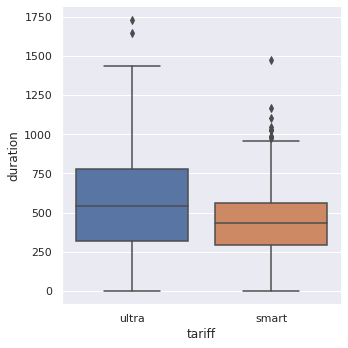

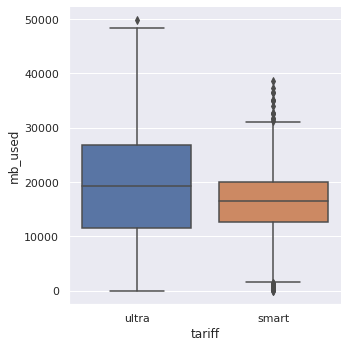

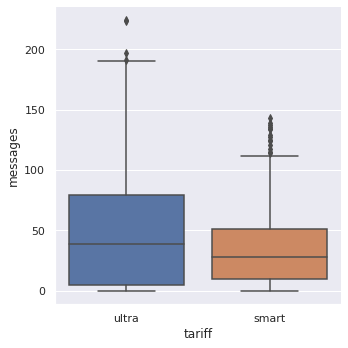

In [26]:
for column in ['duration', 'mb_used', 'messages']:    
    sns.catplot(x="tariff", y=column, kind="box", data=grouped_data, orient='v')

Исходя из графиков можно сделать следующие выводы:
- Пользователи тарифа "Смарт" в среднем разговаривают 450 минут, а "Ультра" 550 минут
- 17000 Мб против 20000 Мб
- 30 сообщения против 40 сообщений

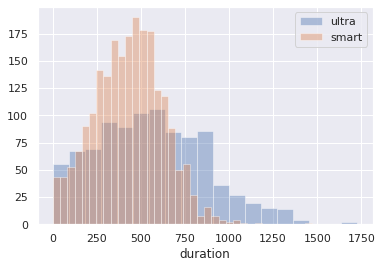

In [27]:
for tariff in ['ultra', 'smart']:
    sns.distplot(grouped_data.query('tariff == @tariff')['duration'], kde=False, label=tariff)
_ = plt.legend(['ultra', 'smart'])
#_ = plt.title('Длительность звонков')

<div class="alert alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

Не забывай указывать заголовки и названия осей на графиках. Это необходимо для того, чтобы понять какие именно показатели отображены на графиках (комментарий ко всему проекту).


    

<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Добавил к графикам названия графиков

</div>

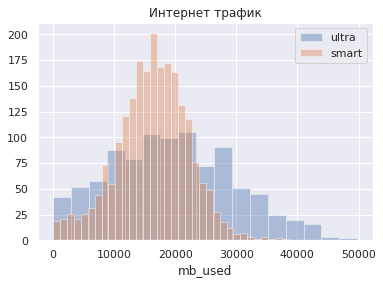

In [28]:
for tariff in ['ultra', 'smart']:
    sns.distplot(grouped_data.query('tariff == @tariff')['mb_used'], kde=False)
_ = plt.legend(['ultra', 'smart'])
_ = plt.title('Интернет трафик')

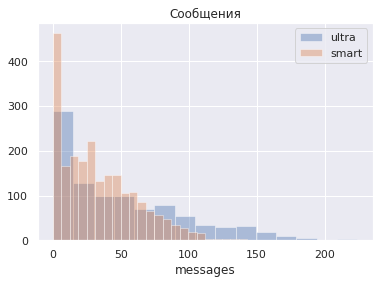

In [29]:
for tariff in ['ultra', 'smart']:
    sns.distplot(grouped_data.query('tariff == @tariff')['messages'], kde=False, label=tariff)
_ = plt.legend(['ultra', 'smart'])
_ = plt.title('Сообщения')

<div class="alert alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

Хороший блок, качественно выполнен, но нужно расписать вывод более детально. Это основная часть проекта, я бы добавил цифр, сколько в среднем минут, интернета и т.д требуется пользователям каждого из тарифов, описать распределения... Также важно выделить какой из тарифов выгоднее для пользователей, а какой для компании. Это основная часть проекта, важно выделить инсайды, которые ты выделил как аналитик

</div>

<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Как видно из гистограм, дисперсия по тарифу "Смарт" меньше, чем у тарифа "Ультра" по всем показателям: по длительности разговора, числу сообщений и интернет трафику и мода у тарифа "Смарт" явно выражена. 
Поведение пользователей тарифа "Ультра" более разнообразное с точки зрения потрбеления услуг. Пользователи дорого тарифа более свободны в том, как использовать объемы тарифного плана, возможно они не задумываются о лимитах, так как должно хватить без проблем и что интернет не отключится, что минут не закончатся. 

</div>

Дисперсия по тарифу "Смарт" меньше, чем тарифа "Ультра" по всем показателям

<div class="alert alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

Проверка гипотез включает в себя формулировку нулевой и альтернативной гипотез, поэтому прошу тебя добавить их

</div>

<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

H0 - средняя выручка пользователей из Москвы равна средней выручки пользователей из регионов \
Н1 - средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов \
alpha = 1%

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

Отлично, гипотезы сформулированы правильно

In [30]:
ultra = grouped_data.query('tariff == "ultra"')['revenue']
smart = grouped_data.query('tariff == "smart"')['revenue']

alpha = .01

results = st.ttest_ind(
    ultra, 
    smart, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.359406166646201e-276
Отвергаем нулевую гипотезу


In [31]:
ultra_disp = np.var(ultra, ddof=1)
smart_disp = np.var(smart, ddof=1)

In [32]:
print('Дисперсия тарифа "Ультра" =', ultra_disp)
print('Дисперсия тарифа "Смарт"  =', smart_disp)

Дисперсия тарифа "Ультра" = 129301.73016137585
Дисперсия тарифа "Смарт"  = 637476.6419242031


<div class="alert alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

У тебя отличная работа и я хочу, чтобы она стала еще лучше. Поэтому, прежде чем произвести проверку гипотезы через T-критерий Стьюдента произведи проверку дисперсии выборок, чтобы понять с каким параметром `equal_var` использовать метод проверки `ttest_ind` (по дефолту True). В работе ты принимаешь его как `False`, при этом никак не обосновываешь свой выбор. Здесь можно вручную посчитать [дисперсии](https://numpy.org/doc/stable/reference/generated/numpy.var.html) (обрати внимание на параметр `ddof`), либо воспользоваться [стат.тестом Левене](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) (там в конце есть неплохой пример)  или [тестом Барлетта](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html). В чем разница в тестах, думаю ты разберешься 🙂

</div>

<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Мы могли бы избавиться от выбросов в данных, но тогда был бы риск потерять часть данных за какой-то промежуток времени из выборочных совокупностей. \
При оспользовании метода проверки `ttest_ind`, значение `True` ставится когда равные дисперсии генеральной совокупности, поэтому был выбран параметр `False`. Расчеты привел выше

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

Согласен, дисперсии наших выборок не равны

Все таки люди, использующие тариф Ультра - переплачивают за услуги

In [33]:
grouped_data.pivot_table(index='tariff', values='revenue', aggfunc='mean')

,revenue
tariff,
smart,1252.399611
ultra,2061.532371


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

Интересно, почему ты выводишь медианы, выедь мы савниваем средние значения

<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Исправил на среднее значение

</div>

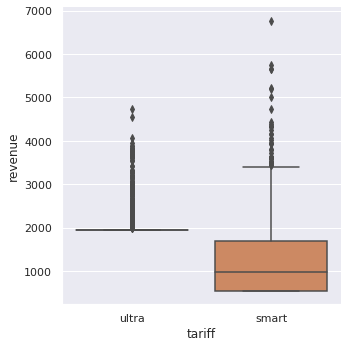

In [34]:
_ = sns.catplot(x="tariff", y='revenue', kind="box", data=grouped_data, orient='v')

Доходы пользователей тарифа "Смарт" и тарифа "Ультра" отличаются

In [35]:
# добавим наименование населенного пункта для каждого пользователя
for user in grouped_data.index:
    grouped_data.loc[user, 'city'] = users.loc[user[0]-1000, 'city']

moscow = grouped_data.query('city == "Москва"')['revenue']
regions = grouped_data.query('city != "Москва"')['revenue']

alpha = .01

results = st.ttest_ind(
    moscow, 
    regions, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.41795844601113885
Не получилось отвергнуть нулевую гипотезу


In [36]:
def det_region(city):
    if city == 'Москва': return 'Москва'
    else: return 'Другой регион'
    
grouped_data['region'] = grouped_data['city'].apply(det_region)
grouped_data.pivot_table(index='region', values='revenue', aggfunc='median')

,revenue
region,
Другой регион,1517.816406
Москва,1731.296875


Без разницы с какого региона, в среднем платят одинаково

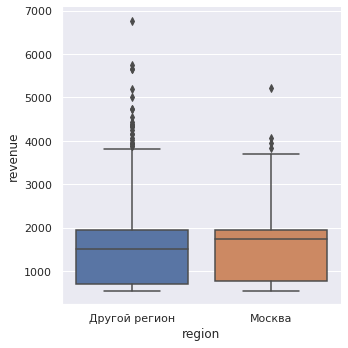

In [37]:
_ = sns.catplot(x="region", y='revenue', kind="box", data=grouped_data, orient='v')

# Общий вывод
- Пользователи "Смарт" тарифа выжимают из включенных в стоимость услуг максимум, но даже этого им не хватает и поэтому они переплачивают на доп услугах 
- Пользователи "Ультра" тарифа не используют включенные в тариф услуги полностью
- Средний доход пользателей Москвы и других регионов не отличается

<div class = "alert alert-danger">
<h2> Комментарии ревьюера <a class="tocSkip"> </h2>

По работе обязательно нужен общий вывод о выборе наиболее выгодного для оператора связи тарифа. Добавь его, пожалуйста.
    
Последний блок с выводами также должен содержать общие выводы по работе, т.е. выжимку по всем разделам исследования (предобработка, анализ показателей, проверка гипотез). Также полезно выделить блок «Рекомендации».

</div>

<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Дополненный вывод: \
По результатам статистического анализа доходы от тарифа "Ультра" больше, чем от тарифа "Смарт". В среднем Мегалайн от одного пользователя в месяц получает 2060 и 1251 рублей соответсвенно. \

Особенности использования:
- Пользователям тарифа "Смарт" не хватает объемов, включенных в тариф, поэтому они в среднем переплачивают 700 рублей каждый месяц (+127%) \
- Пользователи "Ультра" тарифа не используют включенные в тариф услуги полностью \
- Средний доход пользателей Москвы и других регионов не отличается. p-value = 0,5 и составляет 188 рублей, в Москве 1733 и в других регионах 1545 рублей
- Тариф "Смарт" - лучше для пользователя, а тариф "Ультра" - для оператора

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

Все так и есть...

<div style="border:solid purple 2px; padding: 20px">

Работа выполнена на очень высоком уровне, ты хорошо используешь собственные функции, отлично визуализируешь распределения, на каждом шаге аргументируешь свой выбор. Мне понравился твой очень вдумчивый подход к работе.

Остались небольшие доработки:

- Перед основным блоком необходимо добавить информацию о проекте;
- По всему проекту необходимо исправить оформление графиков (добавить подписи);
- В шаге 3 необходимо дополнить анализ (без группировки по пользователям);
- В шаге 3 необходимо более детально расписать вывод;
- В шаге 4 необходимо дополнить формулировку гипотез;
- В шаге 4 необходимо провести проверку равенства дисперсии выборок;
- В шаге 5 необходимо дополнить общий вывод.

Я уверен, ты легко справишься с доработками, жду твоих исправлений 😊

<div>